In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from dataclasses import dataclass

In [2]:
df = pd.read_csv('comment_data.csv')

In [5]:
df.columns = list(range(1,55))

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

          1         2         3         4         5         6         7   \
1   1.000000  0.044805  0.623427 -0.042130  0.059573  0.158659  0.166384   
2   0.044805  1.000000  0.166776 -0.060152 -0.002839  0.169183  0.154933   
3   0.623427  0.166776  1.000000 -0.148628  0.181437  0.481951  0.518555   
4  -0.042130 -0.060152 -0.148628  1.000000 -0.041647 -0.313501 -0.229884   
5   0.059573 -0.002839  0.181437 -0.041647  1.000000  0.127588  0.474424   
6   0.158659  0.169183  0.481951 -0.313501  0.127588  1.000000  0.706952   
7   0.166384  0.154933  0.518555 -0.229884  0.474424  0.706952  1.000000   
8   0.145196  0.121730  0.455472 -0.188747  0.551740  0.574630  0.963978   
9   0.174539  0.178341  0.540973 -0.288381  0.202055  0.895061  0.894534   
10  0.015751 -0.003996  0.059713 -0.011618  0.610646  0.045737  0.222317   
11  0.182847  0.201203  0.509206 -0.285483  0.087523  0.851243  0.661008   
12  0.162381  0.128647  0.525245 -0.217055  0.443283  0.671981  0.950264   
13  0.113486

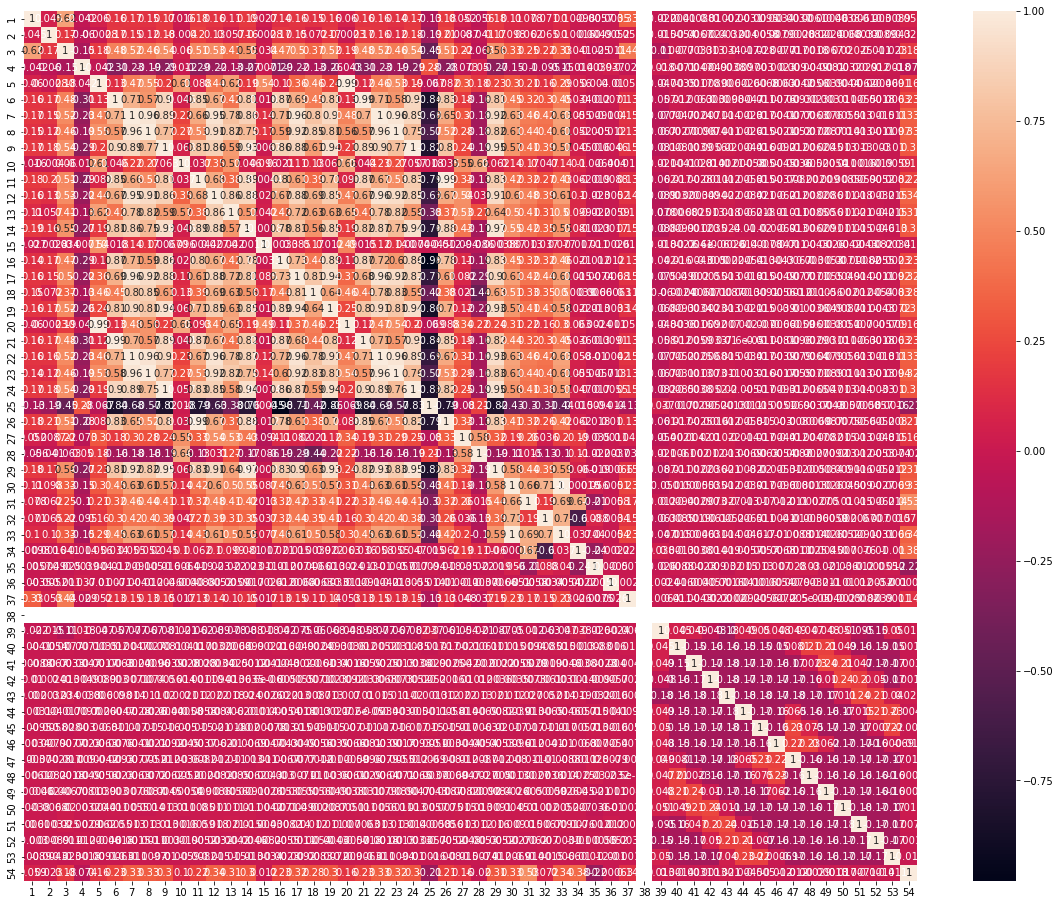

In [7]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()

In [9]:
# Older method of creating classes

class LinearRegression:

    def __init__(self, X, y, learningrate, maxIteration, epsilon, gd = False, sgd = False, regularization = False, regparameter = None):
        self.learningrate = learningrate
        self.X = X
        self.y = y
        self.epsilon = epsilon
        self.maxIteration = maxIteration
        self.gd = gd
        self.regularization = regularization
        self.regparameter = regparameter
        self.sgd = sgd

    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state=0, shuffle=True)
        return X_train, X_test, y_train, y_test

    def add_X0(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])

    def normalizeTrain(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_norm = (X - mean)/std
        # First normalize then add column of 0 otherwise you get division by 0 error
        X_norm = self.add_X0(X_norm)
        return X_norm, mean, std

    def normalizeTest(self, X, mean, std):
        X_norm = (X - mean)/ std
        X_norm = self.add_X0(X_norm)
        return X_norm

    def rank(self, X):
        rank = np.linalg.matrix_rank(X)
        # OR
        # v, s, u = np.linalg.svd(X)
        #rank = sum([1 if abs(x) > 0 else 0 for x in s])
        return rank
      
    def checkFullRank(self, X):
        rank = self.rank(X)
        if rank == min(X.shape):
          self.FullRank = True
        else:
          self.FullRank = False

    def checkLowRank(self, X):
        if X.shape[1] < X.shape[0]:
          self.lowRank = False
        else:
          self.lowRank = True
    
    def normalEquation(self, X, y):
        if self.regularization == True:
          print("Normal Equation with Regularization")
          I=np.identity(X.T.dot(X).shape[0])
          I=self.regparameter*I
          return np.linalg.inv(X.T.dot(X)+I).dot(X.T).dot(y)
        else:
          print("Normal Equation without Regularization")
          return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.w)

    def sse(self, X, y):
        y_hat = self.predict(X)
        if self.regularization == False:
          #print('no regularization')
          z = ((y_hat-y) ** 2).sum()
          #print(z)
          return z
        else:
          #print('regularization')
          z = ((y_hat-y)**2).sum() + (self.regparameter*(self.w)**2).sum()
          #print(z)
          return z

    def costFunction(self, X, y):
        # RMSE or SSE
          return self.sse(X, y)

    def costDerivative(self, X, y):
        if self.regularization == True: # if regularization
          y_hat = self.predict(X)
          #print(X.T.dot((y_hat-y)) + self.regparameter*(self.w))
          return (X.T.dot((y_hat-y)) + self.regparameter*(self.w))
        else:
          y_hat = self.predict(X)
          #print(X.T.dot((y_hat - y)))
          return X.T.dot((y_hat - y))

    def reggradientDescent(self, X, y):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
          gradient = self.costDerivative(X, y)
          self.w = self.w-self.learningrate * gradient
          #print(self.w)
          current_error = self.costFunction(X, y)
          #print(current_error)
          errors.append(current_error)
          if np.abs(current_error - error_prev) < self.epsilon:
            print("Model Stopped Learning")
            break
          error_prev = current_error 
        self.plot_rmse(errors)   

    def gradientDescent(self, X, y):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
          gradient = self.costDerivative(X, y)
          self.w = self.w-self.learningrate * gradient
          #print(self.w)
          current_error = self.costFunction(X, y)
          #print(current_error)
          errors.append(current_error)
          if np.abs(current_error - error_prev) < self.epsilon:
            print("Model Stopped Learning")
            break
          error_prev = current_error
        self.plot_rmse(errors)

        # plot using last method
        # add more convergence checks yourself

    def stochasticgradientDescent(self, X, y):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
          sample_rows_X = np.random.choice(X.shape[0], size=50, replace=False) 
          sample_X = X[sample_rows_X, :]
          sample_y = np.random.choice(y, size=50, replace=False) 
          gradient = self.costDerivative(sample_X, sample_y)
          self.w = self.w-self.learningrate * gradient
          #print(self.w)
          current_error = self.costFunction(sample_X, sample_y)
          #print(current_error)
          errors.append(current_error)
          if np.abs(current_error - error_prev) < self.epsilon:
            print("Model Stopped Learning")
            break
          error_prev = current_error
        self.plot_rmse(errors)

        # plot using last method
        # add more convergence checks yourself

    def calculate_rmse(self, X_test, y_test, theta):
          mse = np.mean((X_test.dot(theta)-y_test)**2)
          rmse = np.sqrt(mse)
          return rmse

    def sum_squared_errors(self, X_test, y_test, theta):
          sse = sum((y[i] - X_test.dot(theta)[i])**2 for i in range(len(y_test)))
          return sse

    def fit(self):
          X_train, X_test, y_train, y_test = self.splitData()
          X_train, mean, std = self.normalizeTrain(X_train)
          X_test = self.normalizeTest(X_test, mean, std)

          #closed form
          self.checkFullRank(X_train)
          self.checkLowRank(X_train)

          if self.FullRank and not self.lowRank and X_train.shape[0] <= 10000 and not self.gd and not self.sgd:
            print("Solving using normal equation")
            self.w = self.normalEquation(X_train, y_train)
          elif self.gd == True and self.regularization == True and not self.sgd:
            # GD with Regularization
            print("solving using gradient descent with regularization")
            self.w = np.zeros(X_train.shape[1])
            self.reggradientDescent(X_train, y_train) 
          elif self.sgd == True:
            print("solving using stochastic gradient descent")
            self.w = np.zeros(X_train.shape[1])
            self.stochasticgradientDescent(X_train, y_train)
          else:
          # Gradient Descent
            #initialize w
            print("solving using gradient descent")
            self.w = np.zeros(X_train.shape[1])
            self.gradientDescent(X_train, y_train)
          print(self.w)
          print("RMSE")
          print(self.calculate_rmse(X_test, y_test, self.w))
          print("SSE")
          print(self.sum_squared_errors(X_test, y_test, self.w))

    def plot_rmse(self, error_sequence):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        #ax.set(xlabel='iterations', ylabel=self.error,
               #title='{} trend'.format(self.error))
        #ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()    
    


In [11]:
# Load CSV file into a numpy array
data = np.genfromtxt('comment_data.csv', delimiter=',')

# Display the shape of the array
print(data.shape)

(40941, 54)


In [12]:
X = data[:,:-1]
y = data[:,-1]

/var/folders/t4/dfv0dtcj5_3_grr325kbtfgr0000gn/T/ipykernel_81977/934319463.py:26: RuntimeWarning: invalid value encountered in true_divide
  X_norm = (X - mean)/std
/var/folders/t4/dfv0dtcj5_3_grr325kbtfgr0000gn/T/ipykernel_81977/934319463.py:32: RuntimeWarning: invalid value encountered in true_divide
  X_norm = (X - mean)/ std


solving using gradient descent** On entry to DLASCL, parameter number  4 had an illegal value

** On entry to DLASCL, parameter number  5 had an illegal value


100%|██████████| 50000/50000 [00:54<00:00, 911.07it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


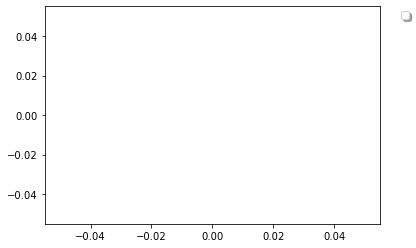

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
RMSE
nan
SSE
nan


In [13]:
reg = LinearRegression(X, y, learningrate = 0.0004, maxIteration= 50000, epsilon = 0.005, gd = True, sgd = False, regularization=False, regparameter=100)
reg.fit()


In [15]:
df[5]

0        0
1        0
2        0
3        0
4        0
        ..
40935    0
40936    0
40937    0
40938    0
40939    0
Name: 5, Length: 40940, dtype: int64

In [ ]:
## Possibly division by zero error during normalization